# Preprocessing data
# Create 3 files : hardHam_clean, easyHam_clean, spam_clean

In [1]:
import regex as re
import os
from text_preprocessing import preprocess_text
from text_preprocessing import (
    to_lower,
    remove_email, 
    remove_url, 
    remove_punctuation, 
    lemmatize_word, 
    remove_number, 
    stem_word, 
    remove_stopword,
    remove_whitespace
)
# Thu vien email.parser dung cho tep file co cau truc gioi tin email http
from email.parser import Parser

### Lay duong dan den tat ca cac file trong folder
def read_files_name(folderPath):
    result = []
    for dirPath, dirs, files in os.walk(folderPath):
        for fileName in files:
            fName = os.path.join(dirPath, fileName)
            result.append(fName)
    return result

### Tra ve 3 mang chua danh sach ten file trong thu muc
def read_forders_Path():
    easyHam = read_files_name('dataset\easy_ham')
    hardHam = read_files_name('dataset\hard_ham')
    spam = read_files_name('dataset\spam')
    return easyHam, hardHam, spam


# def strip_url(mess):
#     return re.sub(r'http[s]?://\S+|www\.\S+', ' ', mess)

def strip_url(mess):
    return re.sub(r'https?://\S+|www\.\S+', ' ', mess)

# def strip_html(mess):
#     # clean html_tag
#     clean = re.compile('<.*?>')
#     mess = re.sub(clean, ' ', mess)
#     # clean html_space_white
#     return re.sub('&nbsp;', ' ', mess)
def strip_html(mess):
    return re.sub('<.*?>', ' ', mess)


def strip_email_header(message):
    message = Parser().parsestr(message)
    subject = message.get('subject', '')
    body = get_email_body(message)

    return '\n'.join((subject, body))

def get_email_body(message):
    payloads = message.get_payload()
    if isinstance(payloads, list):
        return '\n'.join([get_email_body(message) for message in payloads])
    elif isinstance(payloads, str):
        return payloads


def preprocessing_data(mess):
    # processing_function_list = [
    #     str.lower,
    #     strip_url,
    #     remove_url,
    #     strip_html,
    #     remove_email,
    #     remove_number,
    #     remove_stopword,
    #     remove_punctuation,
    #     remove_whitespace

    # ]

    preprocess_functions = [strip_email_header, to_lower, remove_email, remove_url,strip_url,strip_html, 
                            remove_number, remove_punctuation, remove_stopword, lemmatize_word]
#     preprocess_functions = [strip_email_header, to_lower, remove_email, remove_url, 
#                             remove_number, remove_punctuation, remove_stopword, lemmatize_word]
#     preprocess_functions = [to_lower, remove_email, remove_url, 
#                             remove_number, remove_punctuation, remove_stopword, lemmatize_word]
    aftermess = preprocess_text(mess, preprocess_functions)

    # return ' '.join(aftermess)
    return aftermess




End Game



In [1]:
import os
import re
from gensim.parsing.preprocessing import (
    strip_multiple_whitespaces,
    strip_numeric,
    strip_punctuation,
    strip_short,
    strip_tags,
    stem_text,
    remove_stopwords,
    preprocess_string
)
from email.parser import Parser

def strip_html_symbols(message):
    html_symbols = [
        '&nbsp;',
    ]
    for symbol in html_symbols:
        message = re.sub(symbol, ' ', message)
    return message


def strip_url(message):
    return re.sub(r'http\S+', ' ', message)


def strip_email_address(message):
    return re.sub(r'\S+@\S+', ' ', message)


def strip_email_header(message):
    message = Parser().parsestr(message)
    subject = message.get('subject', '')
    body = get_email_body(message)

    return '\n'.join((subject, body))


def get_email_body(message):
    payloads = message.get_payload()
    if isinstance(payloads, list):
        return '\n'.join([get_email_body(message) for message in payloads])
    elif isinstance(payloads, str):
        return payloads


def preprocessing_data(raw_message):
    FILTERS = [
        strip_email_header,
        str.lower,
        strip_html_symbols,
        strip_tags,
        strip_url,
        strip_email_address,
        strip_punctuation,
        strip_numeric,
        strip_multiple_whitespaces,
        strip_short,
        remove_stopwords,
        stem_text,
    ]

    tokens = preprocess_string(raw_message, filters=FILTERS)
    return ' '.join(tokens)

C:\Users\dat.pt173001\Anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
### Lay duong dan den tat ca cac file trong folder
def read_files_name(folderPath):
    result = []
    for dirPath, dirs, files in os.walk(folderPath):
        for fileName in files:
            fName = os.path.join(dirPath, fileName)
            result.append(fName)
    return result

### Tra ve 3 mang chua danh sach ten file trong thu muc
def read_forders_Path():
    easyHam = read_files_name('dataset\easy_ham')
    hardHam = read_files_name('dataset\hard_ham')
    spam = read_files_name('dataset\spam')
    return easyHam, hardHam, spam

def handler():
    easyHam,hardHam,spam = read_forders_Path()
    count=0
#     with open(a[0], 'r', encoding='latin') as fi:
#         print(preprocessing_data(fi.read()))
    f=open('dataset\easyHam_clean.txt','a+',encoding='utf-8')
#     print(len(easyHam))
    for i in easyHam:
        try:
            with open(i, 'r', encoding='latin') as fi:
                temp=preprocessing_data(fi.read())
            f.write(temp)
#                print(preprocessing_data(fi.read())) 
            f.write('\n')
        except Exception as e:
            print(i + "Exception :" + str(e))
            count+=1
            continue
    f.close()
    ### hardHam
    f=open('dataset\hardHam_clean.txt','a+',encoding='utf-8')
    for i in hardHam:
        try:
            with open(i, 'r', encoding='latin') as fi:
                temp=preprocessing_data(fi.read())
            f.write(temp)
#                print(preprocessing_data(fi.read())) 
            f.write('\n')
        except Exception as e:
            print(i + "Exception :" + str(e))
            count+=1
            continue
    f.close()
    
    ### spam 
    f=open('dataset\spam_clean.txt','a+',encoding='utf-8')
    for i in spam:
        try:
            with open(i, 'r', encoding='latin') as fi:
                temp=preprocessing_data(fi.read())
            f.write(temp)
#                print(preprocessing_data(fi.read())) 
            f.write('\n')
        except Exception as e:
            print(i + "Exception :" + str(e))
            count+=1
            continue
    f.close()
    print("End Game\n")
#     for i in hardHam:
#         f=open('dataset\hardHam_clean.txt','w+')
#         with open(i, 'r', encoding='latin') as fi:
#             f.write(preprocessing_data(fi.read()))
#         f.write(' ')
#     f.close()
#     for i in spam:
#         f=open('dataset\spam_clean.txt','w+')
#         with open(i, 'r', encoding='latin') as fi:
#             f.write(preprocessing_data(fi.read()))
#         f.write(' ')
#     f.close()
if __name__ == "__main__":
    handler()

End Game



# Thống kê tần suất xuất hiện và tính xác suất trước

In [3]:
# Viết 1 hàm: input 1 file, output 1 mảng kiểu map (từ, fre)
from collections import Counter, defaultdict
from random import shuffle
import pandas as pd
from math import log
import wordcloud
import matplotlib.pyplot as plt
import plotly_express as px
import wordcloud
import nltk
import warnings

# ham hien thi bieu do du lieu theo tan suat cua tu
def show_wordcloud(messages, title):
    text = ' '.join(messages)
    stopwords = set(wordcloud.STOPWORDS)
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords, background_color="#ffa78c",
                                        width = 3000, height = 2000).generate(text)
    plt.figure(figsize=(15,15), frameon=True)
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=20)
    plt.show()

In [4]:
def load_data(fileName):
    with open('dataset\\'+fileName, 'r', encoding='utf-8') as fi:
            temp=fi.readlines()
    return temp

In [5]:
def word_freq(data_train):
    result=Counter()
    for email in data_train:
        word=email.split(' ')
        result.update(word)
    return result

In [6]:
def readData():
    easyHam = load_data('easyHam_clean.txt')
    hardHam = load_data('hardHam_clean.txt')
    spam = load_data('spam_clean.txt')
    return easyHam,hardHam,spam

In [7]:
easyHam,hardHam,spam=readData()

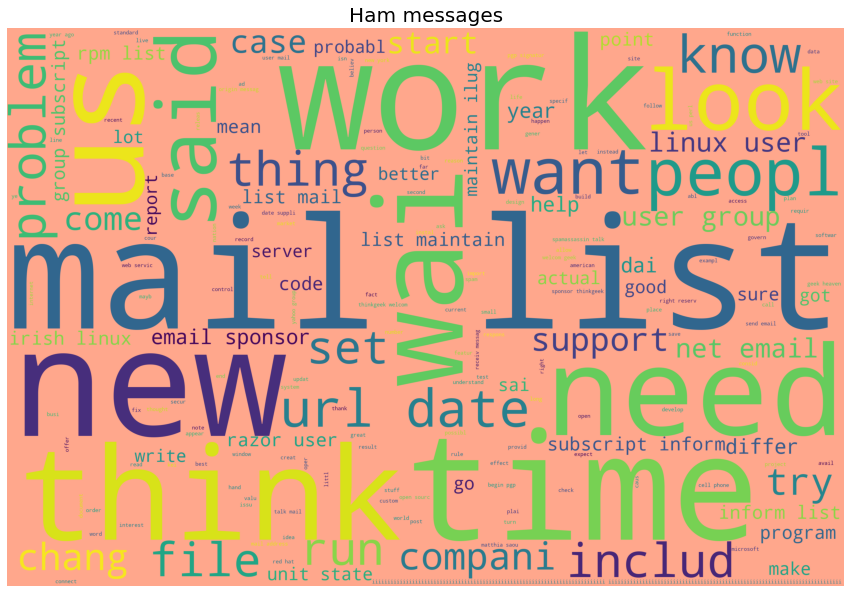

In [8]:
show_wordcloud(easyHam+hardHam, "Ham messages")

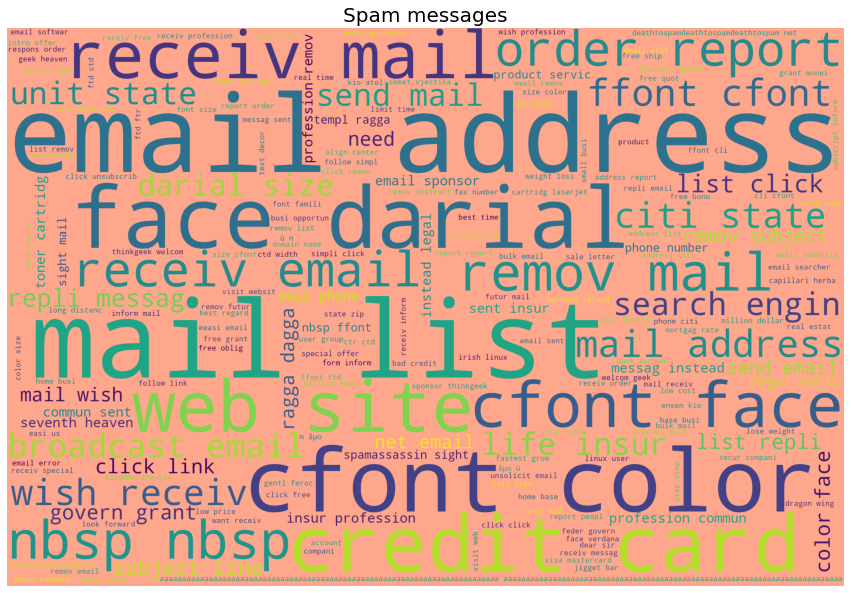

In [9]:
show_wordcloud(spam, "Spam messages")

In [10]:
# datas=easyHam+hardHam+spam
datas=hardHam+spam

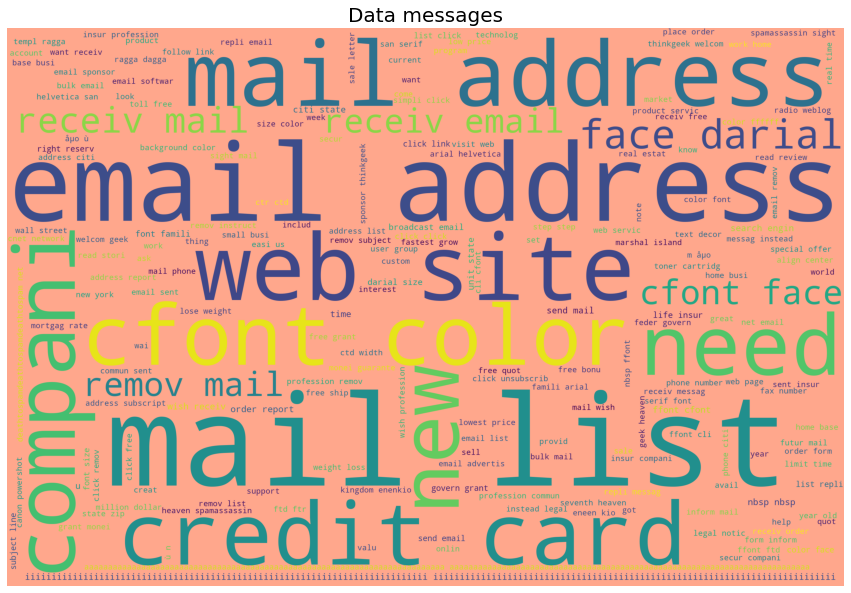

In [11]:
show_wordcloud(datas, "Data messages")

In [12]:
# labels = [0] * len(easyHam)+[0]*len(hardHam)+[1]*len(spam)
labels = [0]*len(hardHam)+[1]*len(spam)

In [13]:
#Hàm trộn theo tỷ lệ cho 1 nhãn, output = train_set,test_set theo nhãn
def shuffle_data(mail_by_label,ratio):
    tmp=mail_by_label.copy()
    shuffle(tmp)
    index=int(len(mail_by_label)*ratio)
#     print (index,len(tmp))
    return tmp[:index],tmp[index:]

In [14]:
# Hàm chia tỷ lệ, mails = data, lables là mảng nhãn ratio là tỷ lệ , input (mails,labels, tỷ lệ), output -> train_set,test_set
# Hàm defaultdict tạo ra kiểu dữ liệu key - value. Trùng key sẽ nối danh sách liên kết vào value
# Hàm zip () :input 2 mảng mails và lables cùng kích thước -> output 1 mảng, mỗi phần tử của mảng gồm 2 phần tử của mail và lable
# Hàm set (): VD input [0,0,0,0,0,0,0,1,1,1,1,1,1,2,2,3,3] -> output [0,1,2,3]
def split_data(mails,labels,ratio):
    split_data_by_labels=defaultdict(list)
    for mail,label in zip(mails,labels):
        split_data_by_labels[label].append(mail)
    train,test=[],[]
    for label in set(labels):
        data_train,data_test=shuffle_data(split_data_by_labels[label],ratio)
        label_train=[label]*len(data_train)
        label_test=[label]*len(data_test)
        train.extend(zip(label_train,data_train))
        test.extend(zip(label_test,data_test))
    data_train = [item[1] for item in train]
    label_train =[item[0] for item in train]
    data_test =[item[1] for item in test]
    label_test =[item[0] for item in test]
    return data_train,data_test,label_train,label_test

In [23]:
data_train,data_test,label_train,label_test=split_data(datas,labels,0.4)
print(len(data_train))
print(len(data_test))

1717
2576


In [24]:
#nhóm email theo nhẫn lớp
def split_by_label(mails, labels):
    split_data_by_labels=defaultdict(list)
    for mail,label in zip(mails,labels):
        split_data_by_labels[label].append(mail)
    return split_data_by_labels
# Tính tần suất xuất hiện của từ trong từng nhãn lớp, và số email của từng nhẫn lớp
def create_Dir(data_train,label_train):
    split_data_by_labels = split_by_label(data_train,label_train)
    spam_freq=word_freq(split_data_by_labels[1])
    ham_freq=word_freq(split_data_by_labels[0])
    total_spam_emails = len(split_data_by_labels[1])
    total_ham_emails = len(split_data_by_labels[0])
    return spam_freq,ham_freq,total_spam_emails,total_ham_emails 

In [41]:
#tính xác suất
def cal_prob(data_train,label_train):
    word_in_spam_freq, word_in_ham_freq,total_spam_emails,total_ham_emails = create_Dir(data_train,label_train)
    #số lần xuất hiện của các từ trong từng nhãn lớp
    total_word_in_spam = sum( word_in_spam_freq.values())
    total_word_in_ham = sum( word_in_ham_freq.values())
    #giá trị tuyệt đối của T
    spam_words = set(word_in_spam_freq.keys())
    ham_words = set(word_in_ham_freq.keys())
    dictionary = spam_words.union(ham_words)
    #xác suất trước của P(ci)
    total_emails= total_spam_emails + total_ham_emails
    spam_prob = total_spam_emails/total_emails
    ham_prob = total_ham_emails/total_emails
    #xác suất của từ khóa trong từ điển đối với hai nhãn
    word_in_spam_probs, word_in_ham_probs = Counter(),Counter()
    for  word in dictionary:
        word_in_spam_probs[word] = (word_in_spam_freq[word]+1)/(total_word_in_spam+len(dictionary))
        word_in_ham_probs[word] = (word_in_ham_freq[word]+1)/(total_word_in_ham +len(dictionary))
    data_ham_probs = pd.DataFrame.from_dict(word_in_ham_probs, orient='index').reset_index()
    data_ham_probs = data_ham_probs.rename(columns={'index':'words', 0:'values'})
    data_spam_probs= pd.DataFrame.from_dict(word_in_spam_probs, orient='index').reset_index()
    data_spam_probs=data_spam_probs.rename(columns={'index':'words', 0:'values'})
    data_ham_probs.to_csv('data_ham_probs.csv', index = False, header=True)
    data_spam_probs.to_csv('data_spam_probs.csv', index = False, header=True) 
    df_pre_prob= pd.DataFrame( {'spam_prob':[spam_prob],'ham_prob':[ham_prob]})
    df_pre_prob.to_csv('data_pre_probs.csv', index = False, header=True)
    print(df_pre_prob)
#     return spam_prob, ham_prob, word_in_spam_probs, word_in_ham_probs
    
cal_prob(data_train,label_train)


   spam_prob  ham_prob
0   0.133947  0.866053


In [42]:
def load_model():
    data_ham_probs= pd.read_csv("data_ham_probs.csv") 
    data_spam_probs= pd.read_csv("data_spam_probs.csv")
    data_pre_prob= pd.read_csv("data_pre_probs.csv")
    # lấy xác suất từ files
    word_in_ham_probs= data_ham_probs.set_index('words')['values'].to_dict()
    word_in_spam_probs= data_spam_probs.set_index('words')['values'].to_dict()
    spam_pre_prob = data_pre_prob['spam_prob'][0]
    ham_pre_prob = data_pre_prob['ham_prob'][0]
    return  word_in_ham_probs, word_in_spam_probs, spam_pre_prob, ham_pre_prob
def classify(mail, word_in_ham_probs, word_in_spam_probs, spam_pre_prob, ham_pre_prob):

#     # lấy tập từ
#     spam_words = set(word_in_spam_probs.keys())
#     ham_words = set(word_in_ham_probs.keys())
#     dictionary = spam_words.union(ham_words)
    #tính xác suất
    mail=preprocessing_data(mail)
    mail_words = mail.split(' ')
    prob_spam = prob_ham = 0.0
    for mail_word in set(mail_words):
        if(word_in_ham_probs.get(mail_word) is not None):
            prob_ham += log(word_in_ham_probs.get(mail_word))
        if(word_in_spam_probs.get(mail_word) is not None):
            prob_spam += log(word_in_spam_probs.get(mail_word))
    prob_ham += log( ham_pre_prob)
    prob_spam += log( spam_pre_prob)

    if prob_spam > prob_ham:
        return 1
    return 0
    

In [43]:
def pre_mails(data_test):    
    result=[]
    word_in_ham_probs, word_in_spam_probs, spam_pre_prob, ham_pre_prob = load_model()
    for i in range(len(data_test)):
        result.append(classify(data_test[i], word_in_ham_probs, word_in_spam_probs, spam_pre_prob, ham_pre_prob))
    return result

In [44]:
predicted_labels=pre_mails(data_test)

In [45]:
def accuracy(label_test,predicted_labels):
    correct = sum([1 if label_test == predicted_label else 0
                    for label_test, predicted_label in zip(label_test, predicted_labels)])
    return correct / len(label_test)*100

In [46]:
print(accuracy(label_test,predicted_labels))

97.21973094170404


In [19]:
def confusion_matrix(label_test,predicted_labels, label):
    true_positive = 0
    false_positive = 0
    true_negative = 0
    false_negative = 0
    for label_test, predicted_label in zip(label_test, predicted_labels):
        if label_test == label and predicted_label == label:
            true_positive += 1
        elif label_test != label and predicted_label != label:
            true_negative += 1
        elif label_test == label and predicted_label != label:
            false_negative += 1
        else:
            false_positive += 1
    return (true_positive, false_negative, false_positive, true_negative)

In [22]:
true_positive_0,false_negative_0,false_positive_0,true_negative_0=confusion_matrix(label_test,predicted_labels,0)
true_positive_1,false_negative_1,false_positive_1,true_negative_1=confusion_matrix(label_test,predicted_labels,1)

In [23]:
Precision_0=true_positive_0/(true_positive_0+false_positive_0)
Precision_1=true_positive_1/(true_positive_1+false_positive_1)
Recall_0=true_positive_0/(true_positive_0+false_negative_0)
Recall_1=true_positive_1/(true_positive_1+false_negative_1)

In [59]:
# 0.4 : 97.51552795031056
# 0.6 : 97.78812572759023
# 0.8 : 98.1373690337602

In [31]:
df= pd.read_csv("./dataset/spam.csv", encoding='latin-1')

In [32]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [33]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)
df.rename(columns = {'v1':'class_label','v2':'message'},inplace=True)
data_ham  = df[df['class_label'] == "ham"].copy()
data_spam = df[df['class_label'] == "spam"].copy()

In [34]:
df['class_label'] = df['class_label'].map( {'spam': 1, 'ham': 0})

In [35]:
messages=df['message'].tolist()

In [36]:
messages_clean=[]
for i in messages:
    messages_clean.append(preprocessing_data(i))

In [37]:
labels=df['class_label'].tolist()

In [38]:
messages_clean,labels

(['jurong point crazi avail bugi great world buffet cine got amor wat',
  'lar joke wif oni',
  'free entri wkly comp win cup final tkt text receiv entri question std txt rate appli',
  'dun earli hor',
  'nah think goe usf live',
  'freemsg hei darl week word like fun xxx std chg send rcv',
  'brother like speak treat like aid patent',
  'request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
  'winner valu network custom select receivea prize reward claim claim code valid hour',
  'mobil month entitl updat latest colour mobil camera free mobil updat free',
  'gonna home soon want talk stuff anymor tonight cri todai',
  'chanc win cash pound txt csh send cost dai dai tsandc appli repli info',
  'urgent won week free membership prize jackpot txt word claim www dbuk net lccltd pobox ldnwarw',
  'search right word thank breather promis wont help grant fulfil promis wonder bless time',
  'date sundai',
  '',
  'watch',
  'rememb spell ye nau

In [39]:
data_train,data_test,label_train,label_test=split_data(messages_clean,labels,0.8)

In [40]:
type(data_spam)

pandas.core.frame.DataFrame